In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Load the data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = train_datagen.flow_from_directory(directory='C:/Users/SANKET/Desktop/Mango_Leaves_Dataset/train', target_size=(256, 256),
                                               batch_size=32, class_mode='categorical', subset='training')
valid_data = train_datagen.flow_from_directory(directory='C:/Users/SANKET/Desktop/Mango_Leaves_Dataset/val', target_size=(256, 256),
                                               batch_size=32, class_mode='categorical', subset='validation')


Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [5]:
# Split the data into training and validation sets
x_train, y_train = train_data.next()
x_valid, y_valid = valid_data.next()

# Flatten the images
x_train = x_train.reshape(x_train.shape[0], -1)
x_valid = x_valid.reshape(x_valid.shape[0], -1)

In [6]:
# Train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(x_train, np.argmax(y_train, axis=1))

# Predict the classes
y_pred_train = svm.predict(x_train)
y_pred_valid = svm.predict(x_valid)

In [7]:
# Calculate the accuracy and confusion matrix
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_pred_train)
valid_accuracy = accuracy_score(np.argmax(y_valid, axis=1), y_pred_valid)
print("Training accuracy:", train_accuracy)
print("Validation accuracy:", valid_accuracy)

train_confusion_matrix = confusion_matrix(np.argmax(y_train, axis=1), y_pred_train)
valid_confusion_matrix = confusion_matrix(np.argmax(y_valid, axis=1), y_pred_valid)
print("Training confusion matrix:\n", train_confusion_matrix)
print("Validation confusion matrix:\n", valid_confusion_matrix)

Training accuracy: 1.0
Validation accuracy: 0.375
Training confusion matrix:
 [[5 0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Validation confusion matrix:
 [[1 1 0 0 0 2 0 0]
 [0 3 0 1 0 0 0 0]
 [0 0 7 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 0]
 [1 3 0 0 0 2 0 0]
 [3 1 0 0 0 2 0 0]]


In [8]:
# Train the model for different numbers of epochs and store the accuracies
train_accs = []
valid_accs = []
for i in range(1, 11):
    svm.fit(x_train, np.argmax(y_train, axis=1))
    y_pred_train = svm.predict(x_train)
    y_pred_valid = svm.predict(x_valid)
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_pred_train)
    valid_accuracy = accuracy_score(np.argmax(y_valid, axis=1), y_pred_valid)
    train_accs.append(train_accuracy)
    valid_accs.append(valid_accuracy)

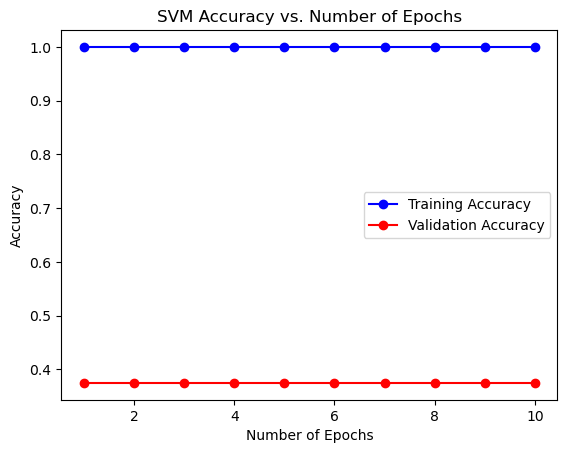

In [9]:
# Plot the accuracies as a function of the number of epochs
epochs = range(1, 11)
plt.plot(epochs, train_accs, 'bo-', label='Training Accuracy')
plt.plot(epochs, valid_accs, 'ro-', label='Validation Accuracy')
plt.title('SVM Accuracy vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, np.argmax(y_train, axis=1))


KNeighborsClassifier()

In [13]:
# Evaluate the accuracy on the validation set
y_pred_valid = knn.predict(x_valid)
valid_accuracy = accuracy_score(np.argmax(y_valid, axis=1), y_pred_valid)
print('Validation Accuracy:', valid_accuracy)

Validation Accuracy: 0.1875


C:\Users\SANKET\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\SANKET\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SANKET\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

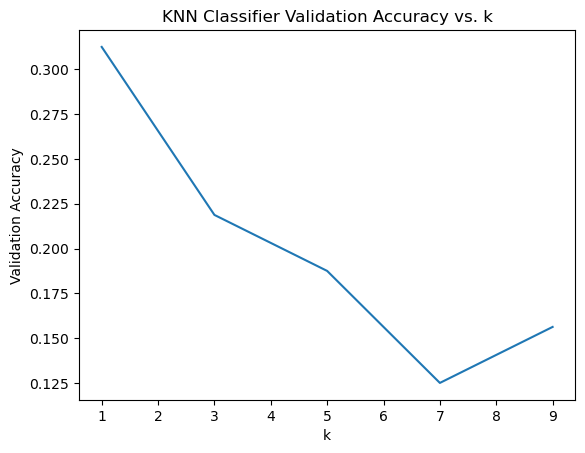

In [14]:
k_values = [1, 3, 5, 7, 9]
valid_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, np.argmax(y_train, axis=1))
    y_pred_valid = knn.predict(x_valid)
    valid_accuracy = accuracy_score(np.argmax(y_valid, axis=1), y_pred_valid)
    valid_accuracies.append(valid_accuracy)

# Plot the validation accuracy vs. k
plt.plot(k_values, valid_accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('KNN Classifier Validation Accuracy vs. k')
plt.show()